In [1]:
import pandas as pd
import random

# Padrão de faixa etária do Brasil
faixas_etarias = [0, 10, 12, 14, 16, 18]
#sendo 0-LIVRE PARA TODOS OS PUBLICOS,
# 10- MAIORES DE 10 ANOS,
# 12- MAIORES DE 12 ANOS,
# 14- MAIORES DE 14 ANOS,
# 16- MAIORES DE 16 ANOS,
# 18- MAIORES DE 18 ANOS

canais_marketing = ['Instagram', 'Google Ads', 'Twitter', 'Facebook', 'LinkedIn', 'YouTube']

def gerar_dados_ficticios(n):
    dados = []
    for _ in range(n):
        nome = f"Campanha_{random.randint(1, 10000)}"
        titulo = f"Filme_{random.randint(1, 10000)}"
        faixa_etaria = random.choice(faixas_etarias)
        budget_total = round(random.uniform(1000, 50000), 2)
        expectativa_alcance = random.randint(10000, 1000000)
        canal_marketing = random.choice(canais_marketing)
        roi = round(random.uniform(0.5, 10) * budget_total, 2)
        cpc = round(random.uniform(0.1, 10), 2)
        numero_conversoes = int(expectativa_alcance * random.uniform(0.01, 0.2))

        dados.append([
            nome, titulo, faixa_etaria, budget_total,
            expectativa_alcance, canal_marketing, roi, cpc, numero_conversoes
        ])

    return pd.DataFrame(dados, columns=[
        'nome', 'titulo', 'faixa_etaria', 'budget_total',
        'expectativa_alcance', 'canal_marketing', 'roi', 'cpc', 'numero_conversoes'
    ])

# Gerar o dataset
dataset = gerar_dados_ficticios(10000)
dataset.to_csv('dataset_campanhas.csv', index=False)
display(dataset)

,nome,titulo,faixa_etaria,budget_total,expectativa_alcance,canal_marketing,roi,cpc,numero_conversoes
0,Campanha_6129,Filme_6297,18,17536.30,85948,Google Ads,59453.19,5.43,3792
1,Campanha_9583,Filme_3769,12,41791.12,174013,Google Ads,29209.62,4.83,32533
2,Campanha_113,Filme_1928,12,28332.87,782969,Instagram,23506.06,0.13,95980
3,Campanha_5342,Filme_1530,12,24915.67,790686,Twitter,81843.29,9.61,84903
4,Campanha_8862,Filme_8815,0,13492.90,30435,YouTube,104007.13,5.96,4974
...,...,...,...,...,...,...,...,...,...
9995,Campanha_5987,Filme_9467,10,8079.76,166105,Google Ads,80027.17,2.76,14577
9996,Campanha_9450,Filme_3879,18,45847.30,126231,YouTube,202002.98,4.44,21189
9997,Campanha_4689,Filme_6231,12,23798.28,986910,Google Ads,173332.78,3.31,80181
9998,Campanha_3357,Filme_4171,0,8907.81,853625,Instagram,74969.61,1.17,17213


# Teste 1

In [ ]:
# -----------------------------------------------
# -------- MODELO PREDITIVO CANAL MARKETING -----
# -----------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Carregar o dataset
dataset = pd.read_csv('dataset_campanhas.csv')

# Remover colunas irrelevantes
dataset = dataset.drop(['nome', 'titulo'], axis=1)

# Mapeamento dos canais de marketing para números
canal_marketing_mapping = {
    'Instagram': 0,
    'Google Ads': 1,
    'Twitter': 2,
    'Facebook': 3,
    'LinkedIn': 4,
    'YouTube': 5
}

dataset['canal_marketing'] = dataset['canal_marketing'].map(canal_marketing_mapping)

# Separar as variáveis independentes e dependentes
X = dataset.drop('canal_marketing', axis=1)
y = dataset['canal_marketing']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

# Reverter a codificação numérica para os nomes dos canais para o relatório
inv_canal_marketing_mapping = {v: k for k, v in canal_marketing_mapping.items()}
target_names = [inv_canal_marketing_mapping[i] for i in sorted(canal_marketing_mapping.values())]

report = classification_report(y_test, y_pred, target_names=target_names)

print(f"Acurácia do modelo: {accuracy_percentage:.2f}%")
print("Relatório de Classificação:")
print(report)


Acurácia do modelo: 16.95%
Relatório de Classificação:
              precision    recall  f1-score   support

   Instagram       0.17      0.17      0.17       328
  Google Ads       0.14      0.16      0.15       316
     Twitter       0.18      0.21      0.19       335
    Facebook       0.21      0.21      0.21       357
    LinkedIn       0.18      0.15      0.16       334
     YouTube       0.14      0.12      0.13       330

    accuracy                           0.17      2000
   macro avg       0.17      0.17      0.17      2000
weighted avg       0.17      0.17      0.17      2000



In [ ]:
# -----------------------------------------------
# -------- MODELO PREDITIVO CANAL MARKETING -----
# -----------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Carregar o dataset
dataset = pd.read_csv('dataset_campanhas.csv')

# Pré-processamento
# Codificar variáveis categóricas (canal_marketing)
le = LabelEncoder()
dataset['canal_marketing'] = le.fit_transform(dataset['canal_marketing'])

# Remover colunas não numéricas que não são úteis para a predição
dataset = dataset.drop(columns=['nome', 'titulo'])

# Criar novas features (opcional)
# Exemplo: relação entre budget e número de conversões
dataset['budget_per_conversion'] = dataset['budget_total'] / (dataset['numero_conversoes'] + 1)  # +1 para evitar divisão por zero

# Dividir em features (X) e target (y)
X = dataset.drop(columns=['canal_marketing'])
y = dataset['canal_marketing']

# Normalizar as features numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Testar diferentes valores de k para KNN
best_k = 0
best_score = 0
for k in range(3, 21, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_score = np.mean(scores)
    print(f"Acurácia média com {k} vizinhos: {mean_score:.4f}")
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print(f"\nMelhor valor de k: {best_k} com acurácia média de {best_score:.4f}")

# Treinar o modelo final com o melhor k
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
report = classification_report(y_test, y_pred, target_names=label_encoders['canal_marketing'].classes_)

print(f"Acurácia do modelo: {accuracy_percentage:.2f}%")
print("Relatório de Classificação:")
print(report)

Acurácia média com 3 vizinhos: 0.1659
Acurácia média com 5 vizinhos: 0.1633
Acurácia média com 7 vizinhos: 0.1596
Acurácia média com 9 vizinhos: 0.1654
Acurácia média com 11 vizinhos: 0.1671
Acurácia média com 13 vizinhos: 0.1660
Acurácia média com 15 vizinhos: 0.1653
Acurácia média com 17 vizinhos: 0.1624
Acurácia média com 19 vizinhos: 0.1614

Melhor valor de k: 11 com acurácia média de 0.1671
Acurácia do modelo: 16.00%
Relatório de Classificação:
              precision    recall  f1-score   support

    Facebook       0.17      0.26      0.21       515
  Google Ads       0.14      0.16      0.15       511
   Instagram       0.17      0.19      0.18       483
    LinkedIn       0.16      0.13      0.14       495
     Twitter       0.14      0.11      0.13       487
     YouTube       0.17      0.11      0.13       509

    accuracy                           0.16      3000
   macro avg       0.16      0.16      0.16      3000
weighted avg       0.16      0.16      0.16      3000



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o dataset
dataset = pd.read_csv('dataset_campanhas.csv')

# Remover colunas irrelevantes
dataset = dataset.drop(['nome', 'titulo'], axis=1)

# Mapeamento dos canais de marketing para números (se ainda não foi feito)
canal_marketing_mapping = {
    'Instagram': 0,
    'Google Ads': 1,
    'Twitter': 2,
    'Facebook': 3,
    'LinkedIn': 4,
    'YouTube': 5
}
dataset['canal_marketing'] = dataset['canal_marketing'].map(canal_marketing_mapping)

# Separar as variáveis independentes e a variável dependente (ROI)
X = dataset.drop('roi', axis=1)
y = dataset['roi']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")


Erro Quadrático Médio (MSE): 7608012443.59
Raiz do Erro Quadrático Médio (RMSE): 87223.92
Coeficiente de Determinação (R²): 0.35


In [ ]:
# ----------------------------------------------------
# -------- MODELO PREDITIVO ROI, CPC e Conversão -----
# ----------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Carregar o dataset
dataset = pd.read_csv('dataset_campanhas.csv')

# Pré-processamento
# Codificar variáveis categóricas (canal_marketing)
le = LabelEncoder()
dataset['canal_marketing'] = le.fit_transform(dataset['canal_marketing'])

# Remover colunas não numéricas que não são úteis para a predição
dataset = dataset.drop(columns=['nome', 'titulo'])

# Criar novas features (opcional)
dataset['budget_per_conversion'] = dataset['budget_total'] / (dataset['numero_conversoes'] + 1)  # +1 para evitar divisão por zero

# Normalizar as features numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.drop(columns=['roi', 'cpc', 'numero_conversoes']))

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, dataset[['roi', 'cpc', 'numero_conversoes']], test_size=0.3, random_state=42)

# Função para treinar e avaliar um modelo
def train_and_evaluate(model, X_train, y_train, X_test, y_test, target_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{target_name} - {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    return y_pred

# Modelos para ROI, CPC e número de conversões
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Treinar e avaliar modelos para cada alvo
for target in ['roi', 'cpc', 'numero_conversoes']:
    print(f"\n### Prevendo {target.upper()} ###")
    for model_name, model in models.items():
        train_and_evaluate(model, X_train, y_train[target], X_test, y_test[target], target)



### Prevendo ROI ###

roi - LinearRegression
Mean Squared Error: 6259108407.3160
R^2 Score: 0.4760

roi - Ridge
Mean Squared Error: 6259162954.8494
R^2 Score: 0.4760

roi - RandomForestRegressor
Mean Squared Error: 6707049516.9081
R^2 Score: 0.4385

### Prevendo CPC ###

cpc - LinearRegression
Mean Squared Error: 8.0845
R^2 Score: 0.0003

cpc - Ridge
Mean Squared Error: 8.0845
R^2 Score: 0.0003

cpc - RandomForestRegressor
Mean Squared Error: 8.6842
R^2 Score: -0.0739

### Prevendo NUMERO_CONVERSOES ###

numero_conversoes - LinearRegression
Mean Squared Error: 996813507.2676
R^2 Score: 0.4769

numero_conversoes - Ridge
Mean Squared Error: 996818202.5487
R^2 Score: 0.4769

numero_conversoes - RandomForestRegressor
Mean Squared Error: 8557923.7478
R^2 Score: 0.9955


In [ ]:
# -------------------------------------------------------
# -------- MODELO PREDITIVO ROI - Linear Regression -----
# -------------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o dataset
dataset = pd.read_csv('dataset_campanhas.csv')

# Pré-processamento
le = LabelEncoder()
dataset['canal_marketing'] = le.fit_transform(dataset['canal_marketing'])
dataset = dataset.drop(columns=['nome', 'titulo'])
dataset['budget_per_conversion'] = dataset['budget_total'] / (dataset['numero_conversoes'] + 1)

# Normalizar as features numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.drop(columns=['roi']))

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, dataset['roi'], test_size=0.3, random_state=42)

# Treinar e avaliar o modelo Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação do modelo
print("### Prevendo ROI ###")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")


### Prevendo ROI ###
Mean Squared Error: 6260260836.3571
R^2 Score: 0.4759


In [ ]:
# -------------------------------------------------------
# -------- MODELO PREDITIVO CPC - Linear Regression -----
# -------------------------------------------------------

In [ ]:
# ---------------------------------------------------------
# -------- MODELO PREDITIVO Conversão - Random Forest -----
# ---------------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o dataset
dataset = pd.read_csv('dataset_campanhas.csv')

# Pré-processamento
le = LabelEncoder()
dataset['canal_marketing'] = le.fit_transform(dataset['canal_marketing'])
dataset = dataset.drop(columns=['nome', 'titulo'])
dataset['budget_per_conversion'] = dataset['budget_total'] / (dataset['numero_conversoes'] + 1)

# Normalizar as features numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.drop(columns=['numero_conversoes']))

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, dataset['numero_conversoes'], test_size=0.3, random_state=42)

# Treinar e avaliar o modelo Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação do modelo
print("### Prevendo Número de Conversões ###")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")



### Prevendo Número de Conversões ###
Mean Squared Error: 10691216.7396
R^2 Score: 0.9944


# Teste 2

### Lógica Implementada
**canais_marketing:** Cada canal de marketing tem um custo base (custo_base) e uma expectativa média de alcance (alcance_medio). Isso cria uma correlação entre o canal escolhido, o orçamento, e a expectativa de alcance.

**Orçamento (budget_total):** Ajustado pelo custo base do canal, refletindo que canais mais caros demandam orçamentos maiores.

**Expectativa de Alcance (expectativa_alcance):** Relacionada diretamente ao orçamento e ao canal de marketing, com um fator aleatório para simular variações reais.

**ROI:** Calculado inversamente ao custo base, sugerindo que canais mais caros precisam de orçamentos maiores para alcançar retornos significativos.

**CPC:** Ajustado pelo custo base do canal e pela faixa etária, refletindo diferenças no custo de aquisição entre diferentes públicos.

**Número de Conversões:** Baseado em uma taxa de conversão que varia realisticamente, relacionada ao alcance.

In [6]:
import pandas as pd
import random
import numpy as np

# Padrão de faixa etária do Brasil
faixas_etarias = [0, 10, 12, 14, 16, 18]

canais_marketing = {
    'Instagram': {'custo_base': 2, 'alcance_medio': 0.15},
    'Google Ads': {'custo_base': 3, 'alcance_medio': 0.20},
    'Twitter': {'custo_base': 1.5, 'alcance_medio': 0.12},
    'Facebook': {'custo_base': 2.5, 'alcance_medio': 0.18},
    'LinkedIn': {'custo_base': 4, 'alcance_medio': 0.10},
    'YouTube': {'custo_base': 3.5, 'alcance_medio': 0.22}
}

def gerar_dados_realistas(n):
    dados = []
    for _ in range(n):
        nome = f"Campanha_{random.randint(1, 10000)}"
        titulo = f"Filme_{random.randint(1, 10000)}"
        faixa_etaria = random.choice(faixas_etarias)

        # Determinando o canal de marketing
        canal_marketing = random.choice(list(canais_marketing.keys()))
        custo_base = canais_marketing[canal_marketing]['custo_base']
        alcance_medio = canais_marketing[canal_marketing]['alcance_medio']

        # Definindo o orçamento com base no canal
        budget_total = round(random.uniform(5000, 50000) * custo_base, 2)

        # Expectativa de alcance relacionada ao orçamento e ao canal
        expectativa_alcance = int(budget_total * alcance_medio * random.uniform(0.8, 1.2))

        # ROI inversamente relacionado ao custo base, ajustado pelo orçamento
        roi = round((random.uniform(0.5, 3) / custo_base) * budget_total, 2)

        # CPC ajustado pelo canal e faixa etária
        cpc = round(custo_base * random.uniform(0.8, 1.5), 2)

        # Número de conversões baseado no alcance e uma taxa de conversão realista
        taxa_conversao = random.uniform(0.01, 0.2)
        numero_conversoes = int(expectativa_alcance * taxa_conversao)

        dados.append([
            nome, titulo, faixa_etaria, budget_total,
            expectativa_alcance, canal_marketing, roi, cpc, numero_conversoes
        ])

    return pd.DataFrame(dados, columns=[
        'nome', 'titulo', 'faixa_etaria', 'budget_total',
        'expectativa_alcance', 'canal_marketing', 'roi', 'cpc', 'numero_conversoes'
    ])

# Gerar o dataset
dataset_realista = gerar_dados_realistas(10000)
dataset_realista.to_csv('dataset_campanhas_realista.csv', index=False)
display(dataset_realista)


,nome,titulo,faixa_etaria,budget_total,expectativa_alcance,canal_marketing,roi,cpc,numero_conversoes
0,Campanha_3611,Filme_5857,10,69324.40,9393,Twitter,80664.16,2.19,1275
1,Campanha_3883,Filme_4935,14,89009.63,17827,Facebook,62797.38,2.03,2132
2,Campanha_8373,Filme_6151,14,124289.56,23730,YouTube,68755.00,4.55,4020
3,Campanha_4855,Filme_1603,16,125507.54,22144,YouTube,41167.66,4.20,1902
4,Campanha_2424,Filme_658,18,23674.78,6248,YouTube,13041.67,5.22,1223
...,...,...,...,...,...,...,...,...,...
9995,Campanha_4065,Filme_1643,10,38879.33,6978,Google Ads,33873.30,4.32,585
9996,Campanha_1199,Filme_5672,18,173576.13,38951,YouTube,38438.98,4.31,5408
9997,Campanha_5478,Filme_5713,12,172409.25,44865,YouTube,123885.98,2.94,6130
9998,Campanha_2903,Filme_6754,12,91577.76,16254,Facebook,31567.80,2.75,1907


Acurácia do modelo: 58.50%

Relatório de Classificação:
              precision    recall  f1-score   support

    Facebook       0.45      0.41      0.43       525
  Google Ads       0.38      0.38      0.38       467
   Instagram       0.53      0.56      0.54       493
    LinkedIn       0.87      0.83      0.85       495
     Twitter       0.70      0.74      0.72       548
     YouTube       0.57      0.57      0.57       472

    accuracy                           0.58      3000
   macro avg       0.58      0.58      0.58      3000
weighted avg       0.58      0.58      0.58      3000



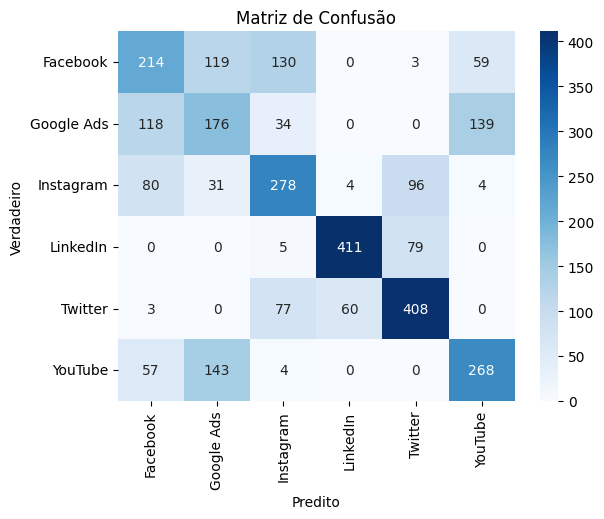

In [8]:
# ----------------------------------------------------------
# ----------- MODELO PREDITIVO CANAL MARKETING -------------
# -- Usando apenas as colunas de idade, budget ealcance ----
# ----------------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
dataset = pd.read_csv('dataset_campanhas_realista.csv')

# Selecionar as colunas relevantes
X = dataset[['faixa_etaria', 'budget_total', 'expectativa_alcance']]
y = dataset['canal_marketing']

# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f"Acurácia do modelo: {accuracy_percentage:.2f}%")

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()


In [9]:
# ----------------------------------------------------
# -------- MODELO PREDITIVO ROI, CPC e Conversão -----
# ----------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Carregar o dataset
dataset = pd.read_csv('dataset_campanhas_realista.csv')

# Pré-processamento
# Codificar variáveis categóricas (canal_marketing)
le = LabelEncoder()
dataset['canal_marketing'] = le.fit_transform(dataset['canal_marketing'])

# Remover colunas não numéricas que não são úteis para a predição
dataset = dataset.drop(columns=['nome', 'titulo'])

# Criar novas features (opcional)
dataset['budget_per_conversion'] = dataset['budget_total'] / (dataset['numero_conversoes'] + 1)  # +1 para evitar divisão por zero

# Normalizar as features numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.drop(columns=['roi', 'cpc', 'numero_conversoes']))

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, dataset[['roi', 'cpc', 'numero_conversoes']], test_size=0.3, random_state=42)

# Função para treinar e avaliar um modelo
def train_and_evaluate(model, X_train, y_train, X_test, y_test, target_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{target_name} - {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    return y_pred

# Modelos para ROI, CPC e número de conversões
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Treinar e avaliar modelos para cada alvo
for target in ['roi', 'cpc', 'numero_conversoes']:
    print(f"\n### Prevendo {target.upper()} ###")
    for model_name, model in models.items():
        train_and_evaluate(model, X_train, y_train[target], X_test, y_test[target], target)



### Prevendo ROI ###

roi - LinearRegression
Mean Squared Error: 688768162.2134
R^2 Score: 0.3035

roi - Ridge
Mean Squared Error: 688762681.7442
R^2 Score: 0.3035

roi - RandomForestRegressor
Mean Squared Error: 546003297.5077
R^2 Score: 0.4479

### Prevendo CPC ###

cpc - LinearRegression
Mean Squared Error: 1.0284
R^2 Score: 0.2061

cpc - Ridge
Mean Squared Error: 1.0284
R^2 Score: 0.2061

cpc - RandomForestRegressor
Mean Squared Error: 0.3687
R^2 Score: 0.7153

### Prevendo NUMERO_CONVERSOES ###

numero_conversoes - LinearRegression
Mean Squared Error: 472698.1576
R^2 Score: 0.6588

numero_conversoes - Ridge
Mean Squared Error: 472683.6352
R^2 Score: 0.6588

numero_conversoes - RandomForestRegressor
Mean Squared Error: 1769.5555
R^2 Score: 0.9987


In [10]:
# -------------------------------------------------------
# -------- MODELO PREDITIVO ROI - Randor Forest ---------
# -------------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o dataset
dataset = pd.read_csv('dataset_campanhas_realista.csv')

# Pré-processamento
le = LabelEncoder()
dataset['canal_marketing'] = le.fit_transform(dataset['canal_marketing'])
dataset = dataset.drop(columns=['nome', 'titulo'])
dataset['budget_per_conversion'] = dataset['budget_total'] / (dataset['numero_conversoes'] + 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.drop(columns=['roi', 'cpc', 'numero_conversoes']))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, dataset[['roi']], test_size=0.3, random_state=42)

# Melhor modelo para ROI: RandomForestRegressor
model_roi = RandomForestRegressor(n_estimators=100, random_state=42)
model_roi.fit(X_train, y_train['roi'])
y_pred_roi = model_roi.predict(X_test)
mse_roi = mean_squared_error(y_test['roi'], y_pred_roi)
r2_roi = r2_score(y_test['roi'], y_pred_roi)

print(f"\nROI - RandomForestRegressor")
print(f"Mean Squared Error: {mse_roi:.4f}")
print(f"R^2 Score: {r2_roi:.4f}")


ROI - RandomForestRegressor
Mean Squared Error: 546003297.5077
R^2 Score: 0.4479


In [11]:
# -----------------------------------------------------------------
# -------- MODELO PREDITIVO CPC - Randor Forest Regressor ---------
# -----------------------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o dataset
dataset = pd.read_csv('dataset_campanhas_realista.csv')

# Pré-processamento
le = LabelEncoder()
dataset['canal_marketing'] = le.fit_transform(dataset['canal_marketing'])
dataset = dataset.drop(columns=['nome', 'titulo'])
dataset['budget_per_conversion'] = dataset['budget_total'] / (dataset['numero_conversoes'] + 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.drop(columns=['roi', 'cpc', 'numero_conversoes']))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, dataset[['cpc']], test_size=0.3, random_state=42)

# Melhor modelo para CPC: RandomForestRegressor
model_cpc = RandomForestRegressor(n_estimators=100, random_state=42)
model_cpc.fit(X_train, y_train['cpc'])
y_pred_cpc = model_cpc.predict(X_test)
mse_cpc = mean_squared_error(y_test['cpc'], y_pred_cpc)
r2_cpc = r2_score(y_test['cpc'], y_pred_cpc)

print(f"\nCPC - RandomForestRegressor")
print(f"Mean Squared Error: {mse_cpc:.4f}")
print(f"R^2 Score: {r2_cpc:.4f}")



CPC - RandomForestRegressor
Mean Squared Error: 0.3687
R^2 Score: 0.7153


In [12]:
# -----------------------------------------------------------------------
# -------- MODELO PREDITIVO CONVERSÃO - Randor Forest Regressor ---------
# -----------------------------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o dataset
dataset = pd.read_csv('dataset_campanhas_realista.csv')

# Pré-processamento
le = LabelEncoder()
dataset['canal_marketing'] = le.fit_transform(dataset['canal_marketing'])
dataset = dataset.drop(columns=['nome', 'titulo'])
dataset['budget_per_conversion'] = dataset['budget_total'] / (dataset['numero_conversoes'] + 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.drop(columns=['roi', 'cpc', 'numero_conversoes']))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, dataset[['numero_conversoes']], test_size=0.3, random_state=42)

# Melhor modelo para Número de Conversões: RandomForestRegressor
model_numero_conversoes = RandomForestRegressor(n_estimators=100, random_state=42)
model_numero_conversoes.fit(X_train, y_train['numero_conversoes'])
y_pred_numero_conversoes = model_numero_conversoes.predict(X_test)
mse_numero_conversoes = mean_squared_error(y_test['numero_conversoes'], y_pred_numero_conversoes)
r2_numero_conversoes = r2_score(y_test['numero_conversoes'], y_pred_numero_conversoes)

print(f"\nNúmero de Conversões - RandomForestRegressor")
print(f"Mean Squared Error: {mse_numero_conversoes:.4f}")
print(f"R^2 Score: {r2_numero_conversoes:.4f}")



Número de Conversões - RandomForestRegressor
Mean Squared Error: 1769.5555
R^2 Score: 0.9987
